# **PCA**

# Bagian Baru

LATIHAN 1: 
Membuat model data reduction dengan menggunakan PCA (Principle Componen Analysis), dengan ketentuan sebagai berikut:
1. Buatlah dataFrame dengan jumlah fiture 15 
2. Generate dataFrame dengan bilangan float secara random antara 0 dan 1, serta buat n_component berjumlah 2.
3. Membuat Label A, B, C dan D (masing-masing jumlah 150 data), kemudian lanjutkan proses reduksi data model PCA sampai dengan visualisasi data dalam bentuk plot

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(150)],
        'feature_2': [random.uniform(0, 1) for i in range(150)],
        'feature_3': [random.uniform(0, 1) for i in range(150)],
        'feature_4': [random.uniform(0, 1) for i in range(150)],
        'feature_5': [random.uniform(0, 1) for i in range(150)],
        'feature_6': [random.uniform(0, 1) for i in range(150)],
        'feature_7': [random.uniform(0, 1) for i in range(150)],
        'feature_8': [random.uniform(0, 1) for i in range(150)],
        'feature_9': [random.uniform(0, 1) for i in range(150)],
        'feature_10': [random.uniform(0, 1) for i in range(150)],
        'feature_11': [random.uniform(0, 1) for i in range(150)],
        'feature_12': [random.uniform(0, 1) for i in range(150)],
        'feature_13': [random.uniform(0, 1) for i in range(150)],
        'feature_14': [random.uniform(0, 1) for i in range(150)],
        'feature_15': [random.uniform(0, 1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C', 'D']) for i in range(150)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.486222,0.795698,0.044892,0.078497,0.461073,0.992640,0.879818,0.739317,0.853794,0.769716,0.291219,0.118282,0.519268,0.362180,0.879882,C
1,0.232938,0.251985,0.064422,0.005112,0.108370,0.852755,0.574292,0.533930,0.949809,0.247089,0.275413,0.631070,0.633550,0.189888,0.929653,D
2,0.478716,0.652829,0.065648,0.823219,0.847686,0.908229,0.798152,0.482141,0.738631,0.796760,0.934763,0.201764,0.637575,0.912435,0.709540,C
3,0.764166,0.737793,0.576976,0.693114,0.086409,0.824696,0.663248,0.839149,0.744298,0.629251,0.058545,0.604411,0.237461,0.350043,0.865066,C
4,0.627437,0.965477,0.920924,0.336020,0.776817,0.157592,0.145242,0.720284,0.681317,0.521491,0.399169,0.630567,0.888557,0.730777,0.948581,A


In [ ]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['label']].values

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.486222,0.795698,0.044892,0.078497,0.461073,0.992640,0.879818,0.739317,0.853794,0.769716
1,0.232938,0.251985,0.064422,0.005112,0.108370,0.852755,0.574292,0.533930,0.949809,0.247089
2,0.478716,0.652829,0.065648,0.823219,0.847686,0.908229,0.798152,0.482141,0.738631,0.796760
3,0.764166,0.737793,0.576976,0.693114,0.086409,0.824696,0.663248,0.839149,0.744298,0.629251
4,0.627437,0.965477,0.920924,0.336020,0.776817,0.157592,0.145242,0.720284,0.681317,0.521491


In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.561360,0.607764
1,-0.520168,0.239166
2,-0.329096,0.362152
3,-0.218782,0.275911
4,0.569294,0.040209


In [ ]:
df[['label']].head()

,label
0,C
1,D
2,C
3,C
4,A


In [ ]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.561360,0.607764,C
1,-0.520168,0.239166,D
2,-0.329096,0.362152,C
3,-0.218782,0.275911,C
4,0.569294,0.040209,A


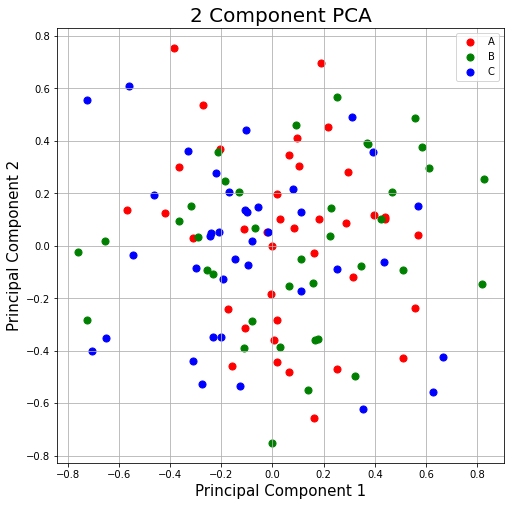

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()